**Minería de Datos**
# Segundo avance del PIA

- Equipo: 8
- *Grupo: 003.  Lunes de 6:00 a 9:00 pm*

#### Integrantes:
- 1806170 Aguirre Avila Tennet Natalia
- 1796550 Flores Ramos Aldair Santos
- 1871089 López Hernández José Eduaro
- 1793930 Vázquez Macías Armando Daniel 

------------------------------------------------------------------------------
## Base de datos
- Nombre de la base de datos:*Bitcoin Historical Dataset*
- Url de l página: *[Bitcoin](https://www.kaggle.com/prasoonkottarathil/btcinusd)*

--------------------------------------------------------------------------------------------------------------------------
#### *- Descripción de la base de datos*
El documento cuenta con tres archivos de Excel y cada uno de estos contiene una base de datos con indicadores de tipo de cambio Bitcoin-USD. Una cuenta con información por minuto, otra cuenta con información por hora y por último la siguiente cuenta con información al cierre de cada jornada diaria. La base de datos de "Bitcoin Historical Dataset" contiene todos los datos históricos de 24 horas (días) desde 210 de agosto de 2015 al 4 de octubre de 2020. Por cuestiones de utilidad, el equipo ha decidido más conveniente usar el archivo que contiene la información diaria, ya que de tal forma es más sencillo manejar la información de la base de datos. 

La base es una tabla que en su mayoría tiene valores numéricos flotantes ya que hablan de precios y volumen de una cripto moneda y cuenta con entradas diarias desde el 10 de agosto de 2015 al 4 de octubre de 2020 contemplado datos de fecha de la entrada, símbolo de la transacción, precio de apertura, precio máximo, precio mínimo, precio de cierre, volumen de "Bitcóines" circulados y volumen de dólares circulados

#### *- Información de las columnas:*
1. Fecha de la entrada (Representa el día en cuestión del cambio y tiene información tipo dato)
2. Símbolo de la transacción (BTCUSD, quiere decir que se hizo el cambio de bitcóin a dólares, tipo dato)
3. Precio de apertura (Valor del bitcóin al inicio del día, tipo flotante)
4. Precio máximo (Valor máximo al final del día que llego el bitcóin, tipo flotante)
5. Precio mínimo (Valor mínimo al final del día que llego el bitcóin, tipo flotante)
6. Precio de cierre (Valor del bitcóin al finalizar el día, tipo flotante)
7. Volumen de "Bitcóines" circulados (Cantidad de moneda electrónica que circulo durante el día, tipo flotante)
8. Volumen de dólares circulados (Cantidad en dólares de la moneda electrónica que circulo durante el día, tipo flotante)

#### *- Tamaño de la base de datos*
La base de datos tiene una cantidad de 8 columnas y 1647 filas

*Toda la información presentada es con la base de datos original, no es de la base de datos limpia*

#### *- Elección de la base de datos*
El equipo, por decisión unánime, votó por una base de datos con información que se considerará de importancia relacionado a temas vistos antes en la carrera de Actuaría. Por lo que, como anteriormente todos los integrantes del equipo llevaron una buena relación con la materia de "Portafolios de inversión" se decidió que un tema de inversión sería el adecuado y proporcionaría mayor interés al trabajo.

#### *- Beneficios*
Los beneficios de la base de datos son amplios, dado que se trata de tema de inversión y teniendo en cuanta que el futuro tiene una gran relación con la tecnología es comprensible que entender estos tipos de base de datos y saber como manipular la información para una interpretación de los datos son de gran apoyo para que tanto el equipo como los demás que están interesados en el tema de la inversión agreguen información extra que en un futuro será muy valioso como el saber cuando invertir en las criptomonedas.

#### *- Objetivo*
- Principal: Pronosticar si es adecuado o no invertir en las criptomonedas. 
- Secundario: Generando pronósticos estadísticos con base exclusiva en el historial del precio cierre del Bitcoin-Dólares Americanos y proveer de información para tomar la mejor decisión. Utilizando series de tiempo podremos saber cuál es el valor ESPERADO del Bitcoin en dólares.

--------------------------------------------------------------------------------------------------------------------------

- Limpieza de la base de datos

*Base sin manipular*

In [1]:
#Tabla
#Importamos bibliotecas necesarias
import pandas as pd
import numpy as np
import json
import seaborn as sns
#Visualizar base de datos
bitcoin=pd.read_csv("C:/Users/HP/Documents/Facultad/Mineria/PIA/BTCUSD_day.csv",encoding='utf8')
bitcoin

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,10/04/2020,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
1,09/04/2020,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,08/04/2020,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,07/04/2020,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,06/04/2020,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17
...,...,...,...,...,...,...,...,...
1642,12/10/2015,BTCUSD,249.50,249.50,247.60,247.60,38.28,9493.89
1643,11/10/2015,BTCUSD,246.30,249.50,246.30,249.50,12.22,3021.12
1644,10/10/2015,BTCUSD,245.39,246.30,244.60,246.30,12.17,2984.44
1645,09/10/2015,BTCUSD,243.95,249.97,243.60,245.39,30.99,7651.63


*Base de datos manipulada*

In [2]:
#Se eliminan las columnas que no son de utilidad
del(bitcoin['Symbol'])
#Esta columna representa el simbolo del cambio pero se sabe que es a USD por lo que no es importante
del(bitcoin['Volume USD'])
#No se quiere saber la cantidad en dolares de las transacciones, solo la cantidad de monedas.

#no funciono con la funcion de .drop() y recurrimos a usar la de del()
#Renombramos las columnas a español para facilitar el entendimiento de nuestro equipo y lectores
bitcoin.rename(columns= {'Date': 'Fecha','Open':'Apertura','High':'Máximo','Low': 'Mínimo','Close': 'Cierre',
                         'Volume BTC': 'Transacciones_BTC'},inplace=True)
bitcoin

,Fecha,Apertura,Máximo,Mínimo,Cierre,Transacciones_BTC
0,10/04/2020,7315.25,7315.25,7315.25,7315.25,0.00
1,09/04/2020,7369.60,7378.85,7115.04,7315.25,2237.13
2,08/04/2020,7201.81,7432.23,7152.80,7369.60,2483.60
3,07/04/2020,7336.96,7468.42,7078.00,7201.81,2333.34
4,06/04/2020,6775.21,7369.76,6771.01,7336.96,3727.47
...,...,...,...,...,...,...
1642,12/10/2015,249.50,249.50,247.60,247.60,38.28
1643,11/10/2015,246.30,249.50,246.30,249.50,12.22
1644,10/10/2015,245.39,246.30,244.60,246.30,12.17
1645,09/10/2015,243.95,249.97,243.60,245.39,30.99


In [3]:
bitcoin.isnull().sum()

Fecha                0
Apertura             0
Máximo               0
Mínimo               0
Cierre               0
Transacciones_BTC    0
dtype: int64

In [4]:
bitcoin.shape

(1647, 6)

In [5]:
bitcoin.to_csv('Basededatosbitcoin.csv')
#Creamos un archivo cvs con los datos ya modificados

### *Información estadística básica*

La información con la cual se trabajará es con los datos de las columnas de "Mínimo" y "Máximo", ya que como se comento se quiere saber si es adecuado invertir o no. La tendencia en que se moverá la criptomoneda durante el día es de vital importancia para visualizar el objetivo.

In [6]:
print("Elementos no nulos de Mínimo: ", bitcoin['Mínimo'].count())
print("Elementos no nulos de Máximo: ", bitcoin['Máximo'].count())

Elementos no nulos de Mínimo:  1647
Elementos no nulos de Máximo:  1647


#### Primero se observa si no existe algun valor nulo. Se observa para saber si algun día el valor del "Bitcoin" tuvo alguna tendencia decreciente a tal grado que no hubó venta. 

In [7]:
print("Valor máximo de la columna Mínimo: ", bitcoin['Mínimo'].max())
print("Valor mínimo de la columna Mínimo: ", bitcoin['Mínimo'].min())
print("")
print("Valor máximo de la columna Máximo: ", bitcoin['Máximo'].max())
print("Valor mínimo de la columna Máximo: ", bitcoin['Máximo'].min())

Valor máximo de la columna Mínimo:  18870.0
Valor mínimo de la columna Mínimo:  236.0

Valor máximo de la columna Máximo:  19999.0
Valor mínimo de la columna Máximo:  245.0


#### Revisamos el valor más bajo y más alto.
#### Podemos observar que lo más bajo del Mínimo que llegó el "Bitcoin" fue de 236 USD lo cual quiere decir que incluso en su peor momento tuvo un valor aceptable mientras que el valor más bajo del Máximo que llegó fue de 245 USD que de igual manera es un valor aceptable.

In [8]:
print("           Mínimo")
print("Media:               ", bitcoin['Mínimo'].median())
print("Varianza:            ", bitcoin['Mínimo'].var())
print("Desviación estandar: ", bitcoin['Mínimo'].std())
print("Valor de asimetría:  ", bitcoin['Mínimo'].skew())
print("Forma distribucion: ", bitcoin['Mínimo'].kurt())
print("")

print("           Máximo")
print("Media:               ", bitcoin['Máximo'].median())
print("Varianza:            ", bitcoin['Máximo'].var())
print("Desviación estandar: ", bitcoin['Máximo'].std())
print("Valor de asimetría:  ", bitcoin['Máximo'].skew())
print("Forma distribucion: ", bitcoin['Máximo'].kurt())
print("")

           Mínimo
Media:                4000.0
Varianza:             14140120.515572675
Desviación estandar:  3760.3351600053784
Valor de asimetría:   0.507081024271698
Forma distribucion:  -0.5284241117408217

           Máximo
Media:                4295.09
Varianza:             16634385.346904585
Desviación estandar:  4078.52735027051
Valor de asimetría:   0.6033387916214218
Forma distribucion:  -0.23871383654310963



#### Como puede observarse, la desviación de el Máximo es muy alto por lo que nos da a entender que destaca que el riesgo es alto y el rendimiento es de naturaleza más volátil y, como tal, también inestable. Por lo cual no es conveniente.

In [9]:
bitcoin.corr()

,Apertura,Máximo,Mínimo,Cierre,Transacciones_BTC
Apertura,1.000000,0.998338,0.997104,0.996786,0.183445
Máximo,0.998338,1.000000,0.996403,0.998504,0.199262
Mínimo,0.997104,0.996403,1.000000,0.998124,0.151037
Cierre,0.996786,0.998504,0.998124,1.000000,0.179781
Transacciones_BTC,0.183445,0.199262,0.151037,0.179781,1.000000


#### Vemos la correlación entre el Máximo y Mínimo, el cual es ambas tienen forma similar de moverse lo cual tambien nos rezalta la gran volatilidad.

In [10]:
bitcoin.cov()

,Apertura,Máximo,Mínimo,Cierre,Transacciones_BTC
Apertura,1.550580e+07,1.603349e+07,1.476434e+07,1.545110e+07,3.204880e+06
Máximo,1.603349e+07,1.663439e+07,1.528147e+07,1.603113e+07,3.605683e+06
Mínimo,1.476434e+07,1.528147e+07,1.414012e+07,1.477480e+07,2.519813e+06
Cierre,1.545110e+07,1.603113e+07,1.477480e+07,1.549606e+07,3.139882e+06
Transacciones_BTC,3.204880e+06,3.605683e+06,2.519813e+06,3.139882e+06,1.968427e+07


#### Su Covarianza nos indica que van a la misma dirección.

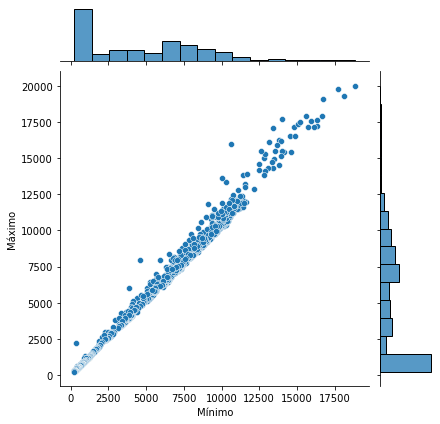

In [11]:
sns.jointplot(x='Mínimo', y='Máximo', data=bitcoin[bitcoin['Mínimo'] < 20000])

#### Esta gráfica muestra la relación entre los precios de Mínimo y de apertura del Bitcoin, así como un histograma en horizontal para el Mínimo y uno vertical para el Máximo

<AxesSubplot:xlabel='Mínimo', ylabel='Density'>

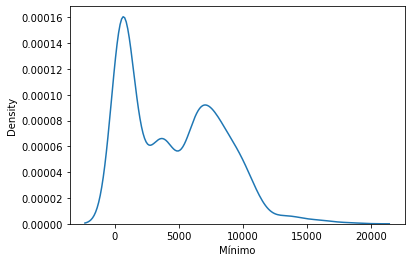

In [12]:
sns.kdeplot(bitcoin.query('Mínimo < 20000').Mínimo)

<AxesSubplot:xlabel='Mínimo', ylabel='Máximo'>

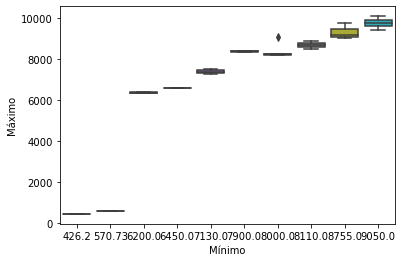

In [13]:
df = bitcoin[bitcoin.Mínimo.isin(bitcoin.Mínimo.value_counts().head(10).index)]
sns.boxplot(
    x='Mínimo',
    y='Máximo',
    data=df
)

#### Esta gráfica muestra que los datos no están normalmente distribuidos.

In [6]:

from rpy2.robjects import r

r('''library("TSA")
library("tseries")
library("ggplot2")
setwd("C:/Users/danya/OneDrive/Documentos/R Daniel")
datos<-read.table(file="BTCUSD_day.csv",header=TRUE,sep=",")
View(datos)
bitcoin<-ts(datos$Close,frequency = 365,start=c(2015,281),end=c(2020,101))
bitcoin

plot(bitcoin,main="Precio de Cierre del Bitcoin",col="blue",lwd=2,cex=0.8)

t<-as.numeric(time(bitcoin))

fit<-lm(bitcoin~t,data=bitcoin)
summary(fit)
abline(fit,col="red")
#No estacionaria en media
adf.test(bitcoin,alternative = "stationary")
#No estacionaria en varianza

bit2<-diff(log(bitcoin))
plot(bit2)
fit2<-lm(bit2~time(bit2),data=bit2)
summary(fit2)
#Estacionaria en media
adf.test(bit2,alternative="stationary")
#Estacionaria en varianza

#La serie es estacionaria

#Seleccion de modelo

AR.aic<-Inf

for(i in 1:20){
  aic <- AIC(arima(bit2, order=c(i,0,0), method="ML"))
  if(aic < AR.aic){
    AR.aic <- aic
    order.ar<- i 
  }
  
}
AR.aic # Muestra el menor AR
order.ar

MA.aic<-Inf

for (i in 1:20){
  aic<-AIC(arima(bit2, order=c(i,0,0),method="ML"))
  if (aic<MA.aic){
    MA.aic<-aic
    order.ma<-i
  }
}
MA.aic
order.ma

ARMA.aic<-Inf

for (j in 1:10){
  for (i in 1:10){
    aic<-AIC(arima(bit2,order=c(j,0,i),method = "ML"))
    if (aic<ARMA.aic){
      ARMA.aic<-aic
      order.arma<-c(j,i)
      
    }
  }
}
ARMA.aic
order.arma

#Residuales
res404<-residuals(arima(bit2,order = c(4,0,4),method="ML"))
mean(res404)
Box.test(res404,type="Ljung-Box")
#Con 95% de confianza, los residuales son ruido blanco
shapiro.test(res404)

#Pronósticos
p404<-predict(arima(bit2,order=c(4,0,4),method="ML"),n.ahead=200)$pred
plot(bit2,xlim=c(2015,2021))
lines(p404,col="red")
p404

p414<-predict(arima(bitcoin,order=c(4,1,4),method="ML"),n.ahead=200)$pred
plot(bitcoin,xlim=c(2015.5,2021),col="blue")
lines(p414,col="red")
p414''')


7243.966378,7361.049962,7355.359055,...,7334.627436,7334.652159,7334.674448


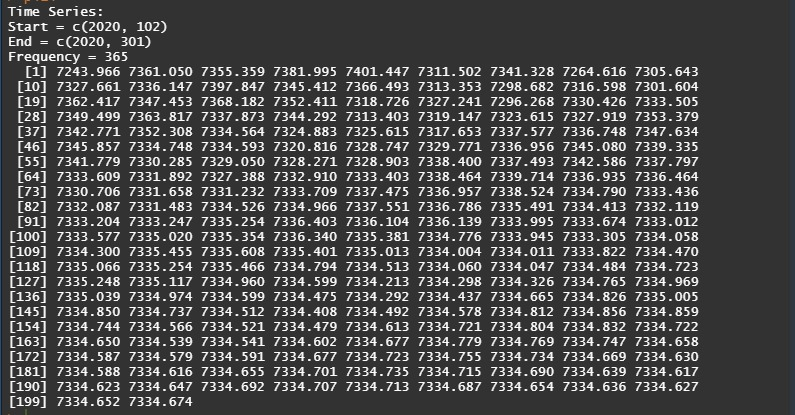

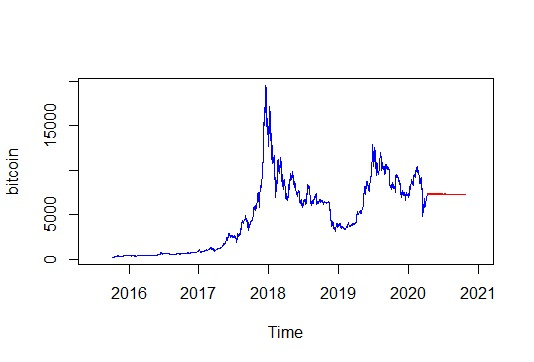

#### Conclusión
Tomando en cuenta que los datos de nuestra base terminan en la primera semana de mayo, los valores reales que tomó el Bitcoin en comparación con los pronósticos netamente estadísticos fueron mejores en comparación. Durante los siguientes 200 días, el valor del Bitcoin contra el dólar americano se vió incrementado en gran medida, por lo que creemos que estando en ese día, hubiera sido una buena decisión invertir en la criptomoneda.